<img style="float: left;;" src='Figures/alinco.png' /></a>
    
# <center> <font color= #000047> Módulo III: Aprendizaje No supervizado: Clustering



# Clustering

> Se le llama “clustering” a la formación de grupos o agrupaciones entre
muestras o entre variables.

> Los “clusters” son formados por datos que cumplen una condición de
agrupación definida en función de algún índice de similitud.

> Los agrupamientos no siempre serán los mismos, ya que depende del tipo de
dato y también depende del tipo de índice de similitud.

> El “Herarchical Clustering” es un algoritmo exhaustivo que realiza la
comparación de todos los datos contra todos. Además es clasificado como un
algoritmo no supervisado, porque no se conoce de antemano los resultados
del proceso de “clustering”.

<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

> Las variables más similares son usadas para crear un cluster o grupo.

> Esto equivale a crear una nueva muestra o nueva variable combinando las similitudes de los pares más similares.
> El criterio más usado es el llamado “complete linkage”.

> Este criterio se basa en crear una nueva muestra o variables eligiendo la máxima similitud del par similar contra los demás datos.

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
import scipy.spatial.distance as sc
from scipy.cluster import hierarchy

In [3]:
#Aplicar el clustering jerárquico

a = np.random.multivariate_normal([10,10],[[3,0],[0,3]], size=100)
b = np.random.multivariate_normal([0,20],[[3,0],[0,3]], size=100)
c = np.random.multivariate_normal([20,20],[[3,0],[0,3]], size=100)

In [4]:
c.shape, b.shape, c.shape

((100, 2), (100, 2), (100, 2))

In [5]:
x = np.concatenate((a,b,c))
x

array([[ 9.93793151e+00,  1.20943384e+01],
       [ 1.12245613e+01,  1.02843483e+01],
       [ 1.13727044e+01,  1.30102340e+01],
       [ 1.18619077e+01,  1.01048160e+01],
       [ 1.31020386e+01,  1.02117213e+01],
       [ 1.27480472e+01,  1.06452498e+01],
       [ 9.66954323e+00,  8.18823402e+00],
       [ 8.05334749e+00,  7.68441638e+00],
       [ 1.01839977e+01,  1.21547608e+01],
       [ 8.97431825e+00,  9.16725381e+00],
       [ 9.17614178e+00,  1.21687205e+01],
       [ 1.17832689e+01,  9.78246701e+00],
       [ 8.29705131e+00,  7.52032183e+00],
       [ 8.10483088e+00,  8.52757747e+00],
       [ 1.14806042e+01,  8.86838075e+00],
       [ 1.07326030e+01,  1.28257085e+01],
       [ 9.14243956e+00,  1.02471998e+01],
       [ 9.05439204e+00,  7.76618952e+00],
       [ 1.15956566e+01,  1.10923801e+01],
       [ 9.23680782e+00,  8.88132194e+00],
       [ 9.26733089e+00,  8.14817207e+00],
       [ 9.14709720e+00,  1.10591037e+01],
       [ 6.35042759e+00,  7.27944380e+00],
       [ 1.

In [6]:
x.shape

(300, 2)

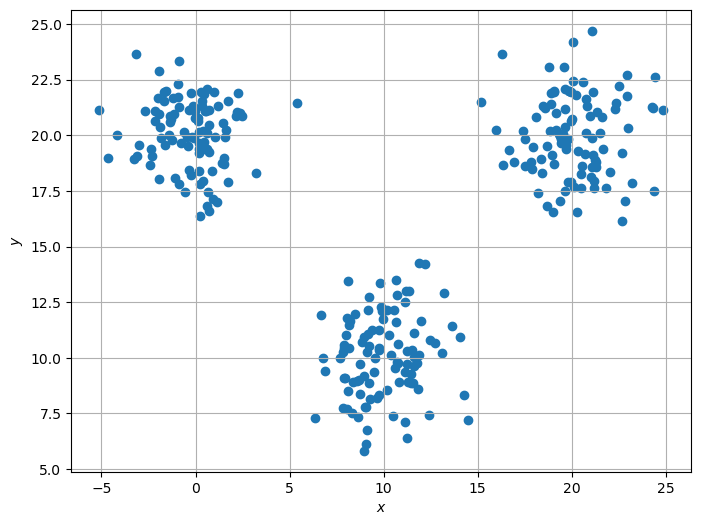

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [8]:
help(hierarchy.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.

    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.

    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.

    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of

In [9]:
# Aplicar clustering Jerarquico
z = hierarchy.linkage(x, metric='euclidean', method='ward')
z

array([[1.70000000e+01, 6.30000000e+01, 2.86966051e-02, 2.00000000e+00],
       [4.20000000e+01, 6.90000000e+01, 3.87173432e-02, 2.00000000e+00],
       [2.27000000e+02, 2.52000000e+02, 4.66250904e-02, 2.00000000e+00],
       ...,
       [5.89000000e+02, 5.92000000e+02, 2.13432752e+01, 1.00000000e+02],
       [5.95000000e+02, 5.96000000e+02, 1.41602545e+02, 2.00000000e+02],
       [5.94000000e+02, 5.97000000e+02, 1.86449987e+02, 3.00000000e+02]])

In [10]:
df_z = pd.DataFrame(z)

In [11]:
df_z

,0,1,2,3
0,17.0,63.0,0.028697,2.0
1,42.0,69.0,0.038717,2.0
2,227.0,252.0,0.046625,2.0
3,258.0,271.0,0.049722,2.0
4,200.0,283.0,0.050999,2.0
...,...,...,...,...
294,588.0,591.0,19.541815,100.0
295,590.0,593.0,20.410824,100.0
296,589.0,592.0,21.343275,100.0
297,595.0,596.0,141.602545,200.0


Text(0, 0.5, 'Distancias o medidas de similitud')

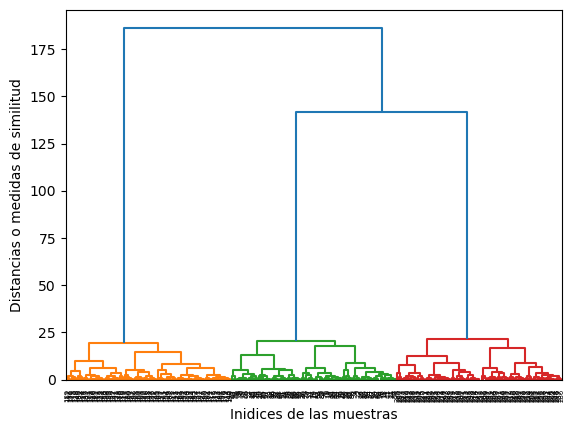

In [13]:
dn = hierarchy.dendrogram(z)
plt.xlabel('Inidices de las muestras')
plt.ylabel('Distancias o medidas de similitud')

## Criterios de selección de grupos


In [15]:
# Criterio del dendrograma
grupos = 3
grupos_c = hierarchy.fcluster(z, grupos, criterion = 'maxclust')
grupos_c

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

In [16]:
x

array([[ 9.93793151e+00,  1.20943384e+01],
       [ 1.12245613e+01,  1.02843483e+01],
       [ 1.13727044e+01,  1.30102340e+01],
       [ 1.18619077e+01,  1.01048160e+01],
       [ 1.31020386e+01,  1.02117213e+01],
       [ 1.27480472e+01,  1.06452498e+01],
       [ 9.66954323e+00,  8.18823402e+00],
       [ 8.05334749e+00,  7.68441638e+00],
       [ 1.01839977e+01,  1.21547608e+01],
       [ 8.97431825e+00,  9.16725381e+00],
       [ 9.17614178e+00,  1.21687205e+01],
       [ 1.17832689e+01,  9.78246701e+00],
       [ 8.29705131e+00,  7.52032183e+00],
       [ 8.10483088e+00,  8.52757747e+00],
       [ 1.14806042e+01,  8.86838075e+00],
       [ 1.07326030e+01,  1.28257085e+01],
       [ 9.14243956e+00,  1.02471998e+01],
       [ 9.05439204e+00,  7.76618952e+00],
       [ 1.15956566e+01,  1.10923801e+01],
       [ 9.23680782e+00,  8.88132194e+00],
       [ 9.26733089e+00,  8.14817207e+00],
       [ 9.14709720e+00,  1.10591037e+01],
       [ 6.35042759e+00,  7.27944380e+00],
       [ 1.

In [18]:
df_x = pd.DataFrame(x)
df_x['clusters'] = grupos_c

In [19]:
df_x

,0,1,clusters
0,9.937932,12.094338,2
1,11.224561,10.284348,2
2,11.372704,13.010234,2
3,11.861908,10.104816,2
4,13.102039,10.211721,2
...,...,...,...
295,16.275177,23.650858,3
296,21.078759,19.863094,3
297,22.512092,22.200830,3
298,20.584123,22.409459,3


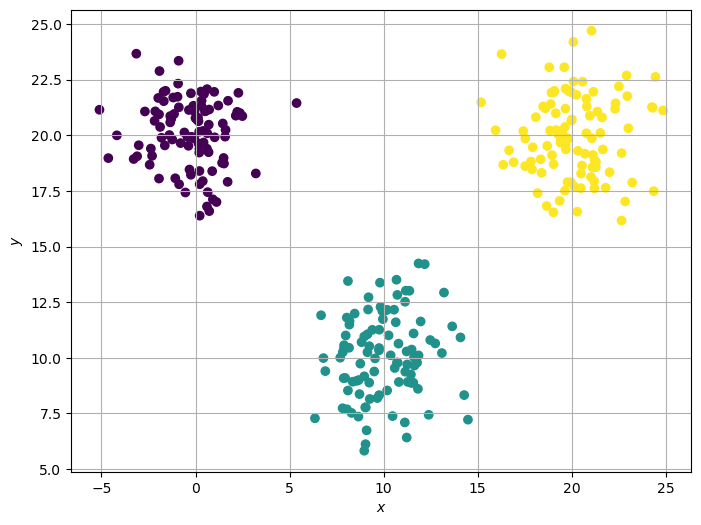

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c = grupos_c)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

## Otros criterios de selección

### Criterio del Codo (1er criterio)


In [21]:
# Gráfica del codo
df_z

,0,1,2,3
0,17.0,63.0,0.028697,2.0
1,42.0,69.0,0.038717,2.0
2,227.0,252.0,0.046625,2.0
3,258.0,271.0,0.049722,2.0
4,200.0,283.0,0.050999,2.0
...,...,...,...,...
294,588.0,591.0,19.541815,100.0
295,590.0,593.0,20.410824,100.0
296,589.0,592.0,21.343275,100.0
297,595.0,596.0,141.602545,200.0


In [23]:
last = z[-15:, 2]
last_rev = last[::-1]
inds = np.arange(1, len(last_rev)+1)


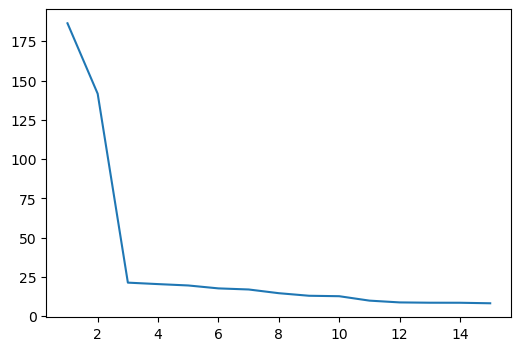

In [24]:
# Graficar critero del codo
plt.figure(figsize=(6,4))
plt.plot(inds, last_rev)
plt.show()

In [25]:
df_z

,0,1,2,3
0,17.0,63.0,0.028697,2.0
1,42.0,69.0,0.038717,2.0
2,227.0,252.0,0.046625,2.0
3,258.0,271.0,0.049722,2.0
4,200.0,283.0,0.050999,2.0
...,...,...,...,...
294,588.0,591.0,19.541815,100.0
295,590.0,593.0,20.410824,100.0
296,589.0,592.0,21.343275,100.0
297,595.0,596.0,141.602545,200.0


In [26]:
# Función que gener y grafique el criterio del codo
def criterio_codo(z, n):
    last = z[-n:, 2]
    last_rev = last[::-1]
    inds = np.arange(1, len(last_rev)+1)

    plt.figure(figsize=(6,4))
    plt.plot(inds, last_rev)
    plt.show()

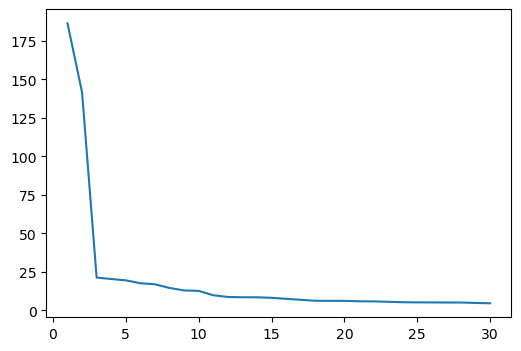

In [28]:
criterio_codo(z, 30)

### Criterio del gradiente


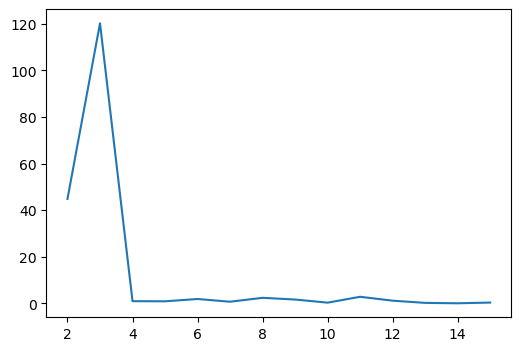

In [31]:
gradiente = np.diff(last)
grad_rev = gradiente[::-1]
plt.figure(figsize=(6,4))
plt.plot(inds[1:], grad_rev)
plt.show()

In [ ]:
# Función que gener y grafique el criterio del gradiente
a

## Aplicar número de grupos opt

In [32]:
grupos = 6
grupos_c = hierarchy.fcluster(z, grupos, criterion = 'maxclust')
grupos_c

array([3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3,
       4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3,
       4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4,
       3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5], d

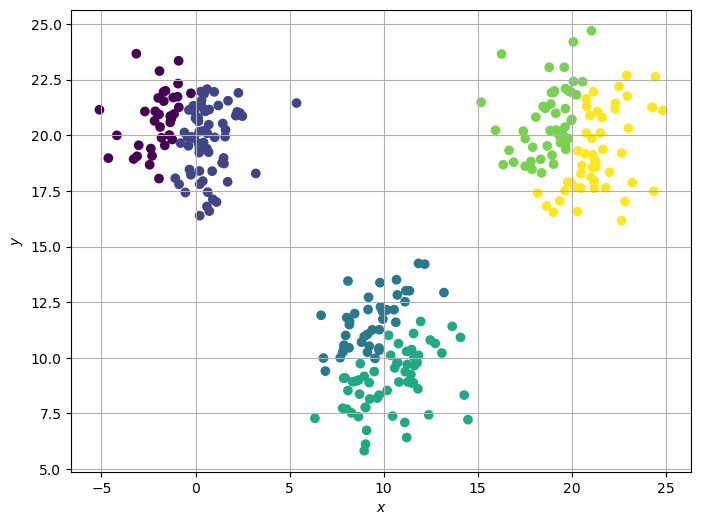

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c = grupos_c)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [34]:
data = pd.read_csv('Data/shopping-data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
# Clustering Jerárquico
data_clientes = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data_clientes

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [37]:
data_clientes.values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [38]:
z = hierarchy.linkage(data_clientes.values, metric='euclidean', method='complete')
z

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 63.        , 200.        ,   1.        ,   3.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 74.        ,  77.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [103.        , 104

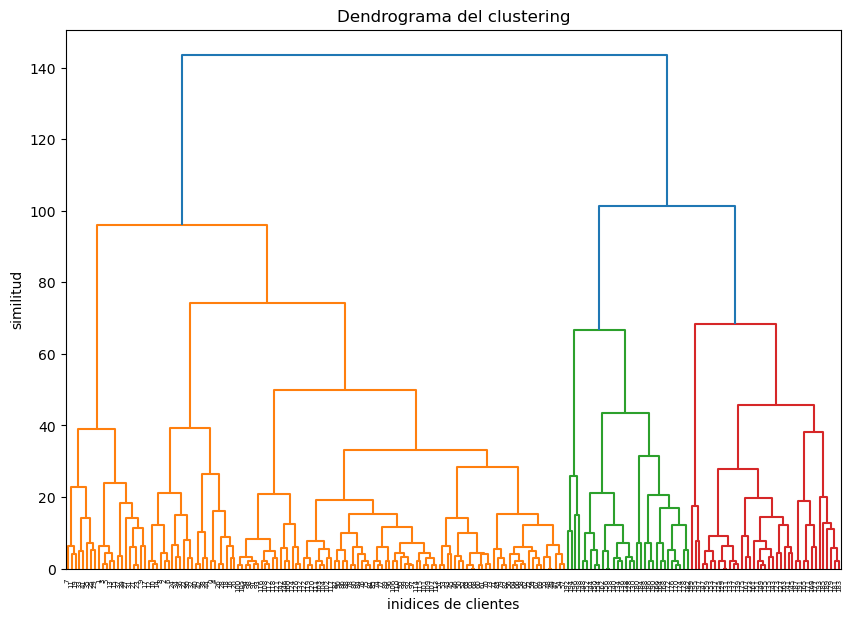

In [39]:
#Dendrograma
plt.figure(figsize=(10,7))
plt.xlabel('inidices de clientes')
plt.ylabel('similitud')
plt.title('Dendrograma del clustering')
dnd=hierarchy.dendrogram(z)

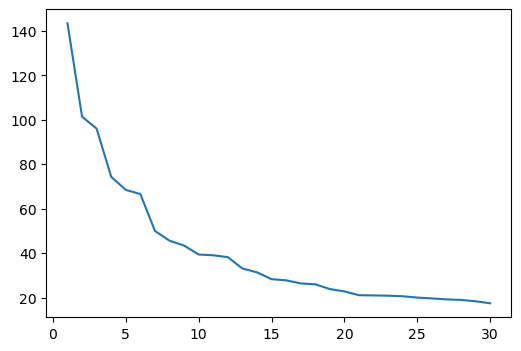

In [43]:
# 2do criterio (criterio del codo)
criterio_codo(z,30)

In [44]:
last = z[-15:,2]

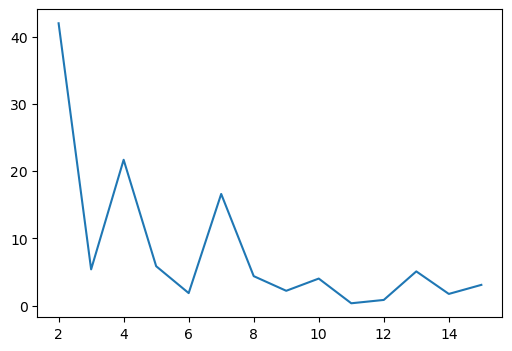

In [45]:
# 3er criterio (criterio del gradiente)
gradiente = np.diff(last)
grad_rev = gradiente[::-1]
plt.figure(figsize=(6,4))
plt.plot(inds[1:], grad_rev)
plt.show()

In [46]:
grupos = 6
grupos_c = hierarchy.fcluster(z, grupos, criterion='maxclust')
grupos_c

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6, 3, 6, 4, 6, 4, 6,
       3, 6, 4, 6, 4, 6, 4, 6, 4, 6, 3, 6, 4, 6, 3, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 3, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 5, 4, 5,
       4, 5], dtype=int32)

In [48]:
data['clusters'] = grupos_c

In [49]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,4
197,198,Male,32,126,74,5
198,199,Male,32,137,18,4


In [50]:
data[data['clusters']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
43,44,Female,31,39,61,3
45,46,Female,24,39,65,3
46,47,Female,50,40,55,3
47,48,Female,27,40,47,3
48,49,Female,29,40,42,3
...,...,...,...,...,...,...
126,127,Male,43,71,35,3
132,133,Female,25,72,34,3
142,143,Female,28,76,40,3
146,147,Male,48,77,36,3


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


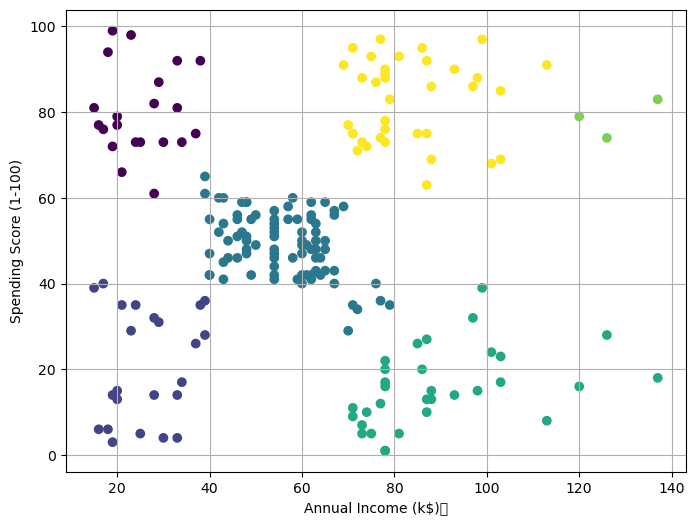

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(data_clientes.iloc[:,0],data_clientes.iloc[:,1], c = grupos_c)
plt.xlabel('Annual Income (k$)	')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()